In [1]:
from darts.models.forecasting.lgbm import LightGBMModel
from darts import TimeSeries
import pandas as pd

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/mahdi/anaconda3/envs/darts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_days_to_consider = 31

df = pd.read_csv('datasets/HomeC.csv', nrows=60*24*n_days_to_consider)

/tmp/ipykernel_12663/2587463283.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasets/HomeC.csv', nrows=60*24*n_days_to_consider)


In [3]:
len(df), len(df)/(24*60)

(44640, 31.0)

## Sanity checks on dataset
    - It is for 349.93 days!
    - 

In [4]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0


In [5]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [6]:
#target_series = TimeSeries.from_csv('datasets/HomeC.csv', 'time', 'use [kW]', nrows=60*24*n_days_to_consider)
target_series = TimeSeries.from_dataframe(df, 'time', 'use [kW]')


In [7]:
target_series

<TimeSeries (DataArray) (time: 44640, component: 1, sample: 1)>
array([[[0.93283333]],

       [[0.93433333]],

       [[0.93181667]],

       ...,

       [[0.32821667]],

       [[0.3288    ]],

       [[0.32805   ]]])
Coordinates:
  * time       (time) int64 1451624400 1451624401 ... 1451669038 1451669039
  * component  (component) object 'use [kW]'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: >

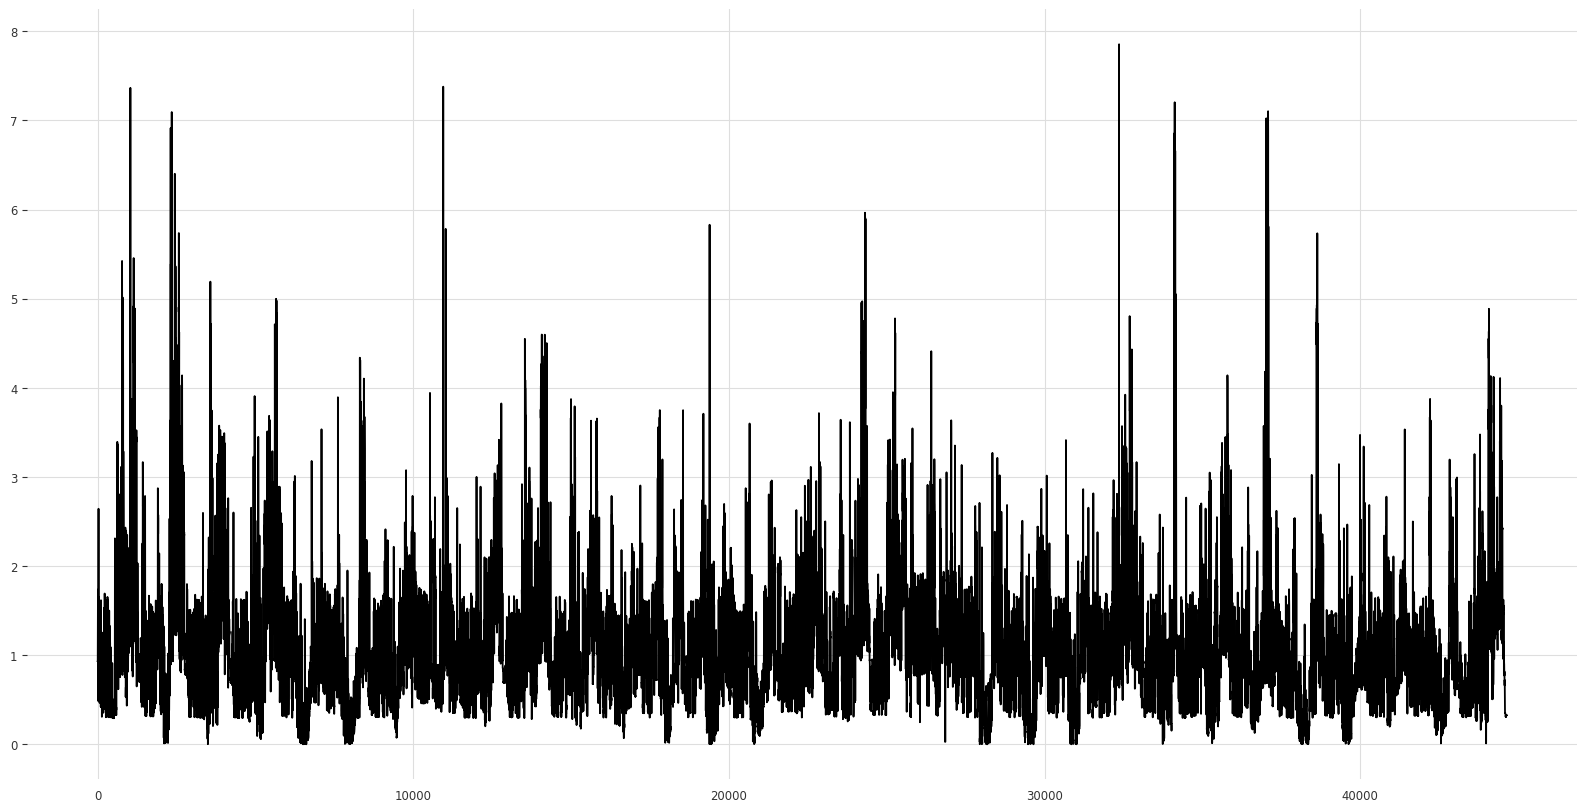

In [8]:
df['use [kW]'].plot(figsize=(20,10))

In [9]:
num_test = 60*24*1
target_series_train, target_series_test = target_series[:-num_test], target_series[-num_test:]

In [10]:
n_lags = 60*24*1
model = LightGBMModel(lags=n_lags, output_chunk_length=num_test)

In [11]:
model.fit(series=target_series_train)

In [ ]:
target_series_test_pred = model.predict(num_test)

In [ ]:
target_series_test.plot(label='test', lw=3)
target_series_test_pred.plot(label='forecast', lw=3)